# **Modul 5 Data Mining 2020 "Density-Based Clustering"**

Sebagian besar teknik pengelompokan tradisional, seperti k-means, hierarkis dan fuzzy clustering, dapat digunakan untuk mengelompokkan data tanpa pengawasan.

Namun, ketika diterapkan pada tugas-tugas dengan bentuk cluster sewenang-wenang, atau cluster dalam-cluster, teknik tradisional mungkin tidak dapat mencapai hasil yang baik. Yaitu, elemen dalam kluster yang sama mungkin tidak memiliki kesamaan yang cukup atau kinerjanya mungkin buruk.
Selain itu, Clustering berbasis Density menempatkan daerah dengan kepadatan tinggi yang dipisahkan satu sama lain dengan daerah dengan kepadatan rendah. Kepadatan, dalam konteks ini, didefinisikan sebagai jumlah titik dalam radius yang ditentukan.

Pada bagian ini, fokus utama akan memanipulasi data dan properti DBSCAN dan mengamati pengelompokan yang dihasilkan.

Impor pustaka berikut:
<ul>
     <li> <b> numpy as np </b> </li>
     <li> <b> DBSCAN </b> dari <b> sklearn.cluster </b> </li>
     <li> <b> make_blobs </b> dari <b> sklearn.datasets.samples_generator </b> </li>
     <li> <b> StandardScaler </b> dari <b> sklearn.preprocessing </b> </li>
     <li> <b> matplotlib.pyplot as plt </b> </li>
</ul> <br>
Ingat <b>%matplotlib inline </b> untuk menampilkan plot

In [1]:
# Pemberitahuan: Untuk visualisasi peta, Anda memerlukan paket basemap.
# jika Anda tidak menginstal basemap di mesin Anda, Anda dapat menggunakan baris berikut untuk menginstalnya
# Pemberitahuan: Anda mungkin harus me-refresh halaman Anda dan menjalankan kembali notebook setelah instalasi
!apt install python3-mpltoolkits.basemap
#Anda harus menginstal matplotlib 2.2.2 untuk bekerja dengan basemap
!pip install matplotlib==2.2.2

No Java runtime present, requesting install.
     |████████████████████████████████| 13.7MB 2.6MB/s eta 0:00:01
  Found existing installation: matplotlib 3.1.0
    Uninstalling matplotlib-3.1.0:
      Successfully uninstalled matplotlib-3.1.0


In [0]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


## **Data generation**


Fungsi di bawah ini akan menghasilkan titik data dan membutuhkan input ini:
<ul>
     <li> <b> centroidLocation </b>: Koordinat centroid yang akan menghasilkan data acak. </li>
     <ul> <li> Contoh: input: [[4,3], [2, -1], [-1,4]] </li> </ul>
     <li> <b> numSamples </b>: Jumlah titik data yang ingin kami hasilkan, terbagi atas jumlah centroid (# centroid yang ditentukan dalam centroidLocation) </li>
     <ul> <li> Contoh: 1500 </li> </ul>
     <li> <b> clusterDeviation </b>: Deviasi standar antara cluster. Semakin besar angkanya, semakin jauh jaraknya. </li>
     <ul> <li> Contoh: 0,5 </li> </ul>
</ul>

In [0]:
def createDataPoints(centroidLocation, numSamples, clusterDeviation):
    # Buat data acak dan simpan dalam matriks fitur X dan vektor respons y.
    X, y = make_blobs(n_samples=numSamples, centers=centroidLocation,
                      cluster_std=clusterDeviation)
    
    # Membakukan fitur dengan menghapus mean dan penskalaan ke varian unit
    X = StandardScaler().fit_transform(X)
    return X, y

Gunakan <b> createDataPoints </b> dengan <b> 3 input </b> dan simpan output ke dalam variabel <b> X </b> dan <b> y </b>.

In [0]:
X, y = createDataPoints([[4,3], [2,-1], [-1,4]] , 1500, 0.5)

## **Modeling**

DBSCAN adalah kependekan dari Clustering Aplikasi Berbasis Kepadatan dengan Noise. Teknik ini adalah salah satu algoritma pengelompokan paling umum yang bekerja berdasarkan kepadatan objek.
Seluruh gagasan adalah bahwa jika suatu titik tertentu milik sebuah cluster, itu harus dekat dengan banyak titik lain dalam cluster itu.

Ini bekerja berdasarkan dua parameter: Epsilon dan Poin Minimum
__Epsilon__ menentukan radius tertentu yang jika menyertakan cukup banyak titik di dalamnya, kami menyebutnya daerah padat
__minimumSamples__ menentukan jumlah titik data minimum yang kita inginkan dalam suatu lingkungan untuk mendefinisikan sebuah cluster.


In [0]:
epsilon = 0.3
minimumSamples = 7
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_
labels

array([0, 1, 2, ..., 2, 2, 1])

## **Distinguish outliers**

Mari Ganti semua elemen dengan 'Benar' di core_samples_mask yang ada di dalam cluster, 'Salah' jika poinnya adalah outlier.

In [0]:
# First, create an array of booleans using the labels from db.

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([ True,  True,  True, ...,  True,  True,  True])

In [0]:
# Jumlah cluster dalam label, abaikan kebisingan jika ada.

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

3

In [0]:
# Hapus pengulangan dalam label dengan mengubahnya menjadi satu set.

unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2}

## **Data visualization**

In [0]:
# Buat warna untuk cluster.

colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
colors

array([[0.61960784, 0.00392157, 0.25882353, 1.        ],
       [0.99346405, 0.74771242, 0.43529412, 1.        ],
       [0.74771242, 0.89803922, 0.62745098, 1.        ],
       [0.36862745, 0.30980392, 0.63529412, 1.        ]])

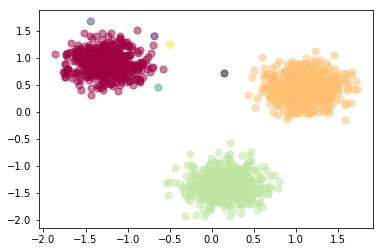

In [0]:
# Plot poin dengan warna
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Hitam digunakan untuk kebisingan.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot titik data yang terkumpul
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=col, marker=u'o', alpha=0.5)

    # Plot outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=col, marker=u'o', alpha=0.5)

<h1 align = center> Clustering Stasiun Cuaca dengan DBSCAN & scikit-learn </h1>
<hr>

DBSCAN sangat baik untuk tugas-tugas seperti identifikasi kelas dalam konteks spasial. Atribut indah dari algoritma DBSCAN adalah bahwa ia dapat mengetahui bentuk cluster sembarang tanpa terpengaruh oleh noise. Sebagai contoh, contoh berikut ini mengelompokkan lokasi stasiun cuaca di Kanada.
<Klik 1>
DBSCAN dapat digunakan di sini, misalnya, untuk menemukan grup stasiun yang menunjukkan kondisi cuaca yang sama. Seperti yang dapat Anda lihat, ia tidak hanya menemukan kelompok yang berbeda bentuknya, dapat menemukan bagian yang lebih padat dari sampel yang berpusat pada data dengan mengabaikan area atau kebisingan yang kurang padat.

mari mulai bermain dengan data. Kami akan bekerja sesuai dengan alur kerja berikut: </font>
1. Memuat data
- Data ikhtisar
- Pembersihan data
- Pemilihan data
- Clustering

### About the dataset

		
<h4 align = "center">
Environment Canada    
Monthly Values for July - 2015	
</h4>
<html>
<head>
<style>
table {
    font-family: arial, sans-serif;
    border-collapse: collapse;
    width: 100%;
}

td, th {
    border: 1px solid #dddddd;
    text-align: left;
    padding: 8px;
}

tr:nth-child(even) {
    background-color: #dddddd;
}
</style>
</head>
<body>

<table>
  <tr>
    <th>Name in the table</th>
    <th>Meaning</th>
  </tr>
  <tr>
    <td><font color = "green"><strong>Stn_Name</font></td>
    <td><font color = "green"><strong>Station Name</font</td>
  </tr>
  <tr>
    <td><font color = "green"><strong>Lat</font></td>
    <td><font color = "green"><strong>Latitude (North+, degrees)</font></td>
  </tr>
  <tr>
    <td><font color = "green"><strong>Long</font></td>
    <td><font color = "green"><strong>Longitude (West - , degrees)</font></td>
  </tr>
  <tr>
    <td>Prov</td>
    <td>Province</td>
  </tr>
  <tr>
    <td>Tm</td>
    <td>Mean Temperature (°C)</td>
  </tr>
  <tr>
    <td>DwTm</td>
    <td>Days without Valid Mean Temperature</td>
  </tr>
  <tr>
    <td>D</td>
    <td>Mean Temperature difference from Normal (1981-2010) (°C)</td>
  </tr>
  <tr>
    <td><font color = "black">Tx</font></td>
    <td><font color = "black">Highest Monthly Maximum Temperature (°C)</font></td>
  </tr>
  <tr>
    <td>DwTx</td>
    <td>Days without Valid Maximum Temperature</td>
  </tr>
  <tr>
    <td><font color = "black">Tn</font></td>
    <td><font color = "black">Lowest Monthly Minimum Temperature (°C)</font></td>
  </tr>
  <tr>
    <td>DwTn</td>
    <td>Days without Valid Minimum Temperature</td>
  </tr>
  <tr>
    <td>S</td>
    <td>Snowfall (cm)</td>
  </tr>
  <tr>
    <td>DwS</td>
    <td>Days without Valid Snowfall</td>
  </tr>
  <tr>
    <td>S%N</td>
    <td>Percent of Normal (1981-2010) Snowfall</td>
  </tr>
  <tr>
    <td><font color = "green"><strong>P</font></td>
    <td><font color = "green"><strong>Total Precipitation (mm)</font></td>
  </tr>
  <tr>
    <td>DwP</td>
    <td>Days without Valid Precipitation</td>
  </tr>
  <tr>
    <td>P%N</td>
    <td>Percent of Normal (1981-2010) Precipitation</td>
  </tr>
  <tr>
    <td>S_G</td>
    <td>Snow on the ground at the end of the month (cm)</td>
  </tr>
  <tr>
    <td>Pd</td>
    <td>Number of days with Precipitation 1.0 mm or more</td>
  </tr>
  <tr>
    <td>BS</td>
    <td>Bright Sunshine (hours)</td>
  </tr>
  <tr>
    <td>DwBS</td>
    <td>Days without Valid Bright Sunshine</td>
  </tr>
  <tr>
    <td>BS%</td>
    <td>Percent of Normal (1981-2010) Bright Sunshine</td>
  </tr>
  <tr>
    <td>HDD</td>
    <td>Degree Days below 18 °C</td>
  </tr>
  <tr>
    <td>CDD</td>
    <td>Degree Days above 18 °C</td>
  </tr>
  <tr>
    <td>Stn_No</td>
    <td>Climate station identifier (first 3 digits indicate   drainage basin, last 4 characters are for sorting alphabetically).</td>
  </tr>
  <tr>
    <td>NA</td>
    <td>Not Available</td>
  </tr>


</table>

</body>
</html>

 

### **Download data**

In [0]:
!wget -O weather-stations20140101-20141231.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/weather-stations20140101-20141231.csv

--2020-02-11 16:36:32--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/weather-stations20140101-20141231.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 129821 (127K) [text/csv]
Saving to: ‘weather-stations20140101-20141231.csv’

weather-stations201 100%[===================>] 126.78K  --.-KB/s    in 0.05s   

2020-02-11 16:36:32 (2.55 MB/s) - ‘weather-stations20140101-20141231.csv’ saved [129821/129821]



## **Load the dataset**

Kita akan mengimpor .csv kemudian membuat kolom untuk tahun, bulan, dan hari.

In [0]:
import csv
import pandas as pd
import numpy as np

filename='weather-stations20140101-20141231.csv'

#Read csv
pdf = pd.read_csv(filename)
pdf.head(5)

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,DwTn,S,DwS,S%N,P,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,0.0,0.0,0.0,NaN,178.8,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,0.0,0.0,0.0,0.0,258.6,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,9.0,0.0,9.0,NaN,264.6,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,2.0,0.0,2.0,NaN,168.4,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573


## **Cleaning**

Mari kita hapus baris yang tidak memiliki nilai apa pun di bidang __Tm__.

In [0]:
pdf = pdf[pd.notnull(pdf["Tm"])]
pdf = pdf.reset_index(drop=True)
pdf.head(5)

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,DwTn,S,DwS,S%N,P,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,0.0,0.0,0.0,NaN,178.8,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,0.0,0.0,0.0,0.0,258.6,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,9.0,0.0,9.0,NaN,264.6,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,2.0,0.0,2.0,NaN,168.4,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573
4,ESQUIMALT HARBOUR,48.432,-123.439,BC,8.8,0.0,NaN,13.1,0.0,1.9,0.0,NaN,NaN,NaN,81.0,8.0,NaN,NaN,12.0,NaN,NaN,NaN,258.6,0.0,1012710


## **Visualization**

Visualisasi stasiun pada peta menggunakan paket basemap. Toolkit basemap matplotlib adalah pustaka untuk memplot data 2D pada peta dengan Python. Basemap tidak melakukan plot sendiri tetapi menyediakan fasilitas untuk mengubah koordinat ke proyeksi peta.

Harap perhatikan bahwa ukuran setiap titik data mewakili rata-rata suhu maksimum untuk setiap stasiun dalam setahun.

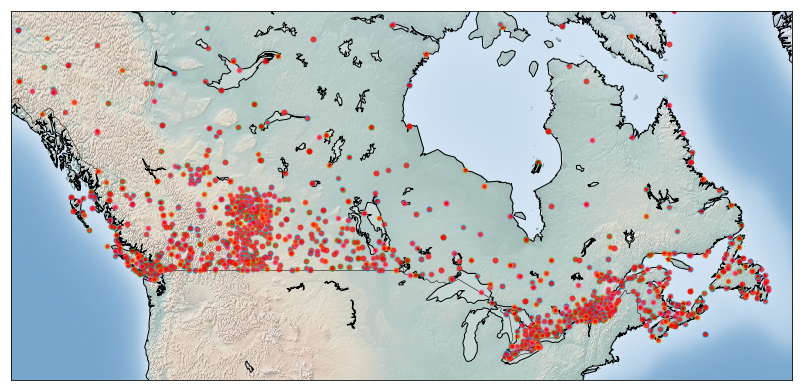

In [0]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

llon=-140
ulon=-50
llat=40
ulat=65

pdf = pdf[(pdf['Long'] > llon) & (pdf['Long'] < ulon) & (pdf['Lat'] > llat) &(pdf['Lat'] < ulat)]

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To collect data based on stations        

xs,ys = my_map(np.asarray(pdf.Long), np.asarray(pdf.Lat))
pdf['xm']= xs.tolist()
pdf['ym'] =ys.tolist()

#Visualization1
for index,row in pdf.iterrows():
#   x,y = my_map(row.Long, row.Lat)
   my_map.plot(row.xm, row.ym,markerfacecolor =([1,0,0]),  marker='o', markersize= 5, alpha = 0.75)
plt.show()



## **Clustering of stations based on their location i.e. Lat & Lon**

__DBSCAN__ merupakan bentuk sklearn library dapat menjalankan DBSCAN clustering dari array vektor atau matriks jarak. Dalam kasus kami, kami memberikannya array Numpy Clus_dataSet untuk menemukan sampel inti kepadatan tinggi dan memperluas cluster dari mereka.

In [0]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = pdf[['xm','ym']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# A sample of clusters
pdf[["Stn_Name","Tx","Tm","Clus_Db"]].head(5)

,Stn_Name,Tx,Tm,Clus_Db
0,CHEMAINUS,13.5,8.2,0
1,COWICHAN LAKE FORESTRY,15.0,7.0,0
2,LAKE COWICHAN,16.0,6.8,0
3,DUNCAN KELVIN CREEK,14.5,7.7,0
4,ESQUIMALT HARBOUR,13.1,8.8,0


Seperti yang Anda lihat untuk outlier, label cluster adalah -1

In [0]:
set(labels)

{-1, 0, 1, 2, 3, 4}

## **Visualization of clusters based on location**

Sekarang, kita dapat memvisualisasikan cluster menggunakan basemap:

Cluster 0, Avg Temp: -5.538747553816051
Cluster 1, Avg Temp: 1.9526315789473685
Cluster 2, Avg Temp: -9.195652173913045
Cluster 3, Avg Temp: -15.300833333333333
Cluster 4, Avg Temp: -7.769047619047619


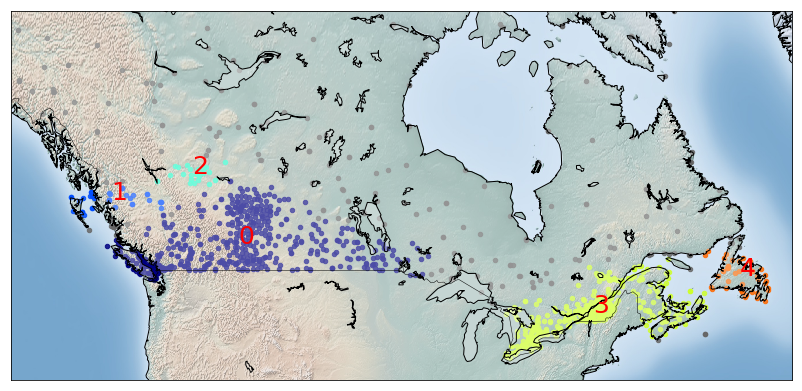

In [0]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))



#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = pdf[pdf.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)
        print ("Cluster "+str(clust_number)+', Avg Temp: '+ str(np.mean(clust_set.Tm)))

## **Clustering of stations based on their location, mean, max, and min Temperature**

Pada bagian ini kita menjalankan kembali DBSCAN, tetapi kali ini pada dataset 5 dimensi:

In [20]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = pdf[['xm','ym','Tx','Tm','Tn']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# A sample of clusters
pdf[["Stn_Name","Tx","Tm","Clus_Db"]].head(5)

,Stn_Name,Tx,Tm,Clus_Db
0,CHEMAINUS,13.5,8.2,0
1,COWICHAN LAKE FORESTRY,15.0,7.0,0
2,LAKE COWICHAN,16.0,6.8,0
3,DUNCAN KELVIN CREEK,14.5,7.7,0
4,ESQUIMALT HARBOUR,13.1,8.8,0


## **Visualization of clusters based on location and Temperture**

Cluster 0, Avg Temp: 6.2211920529801334
Cluster 1, Avg Temp: 6.790000000000001
Cluster 2, Avg Temp: -0.49411764705882355
Cluster 3, Avg Temp: -13.877209302325586
Cluster 4, Avg Temp: -4.186274509803922
Cluster 5, Avg Temp: -16.301503759398482
Cluster 6, Avg Temp: -13.599999999999998
Cluster 7, Avg Temp: -9.753333333333334
Cluster 8, Avg Temp: -4.258333333333334


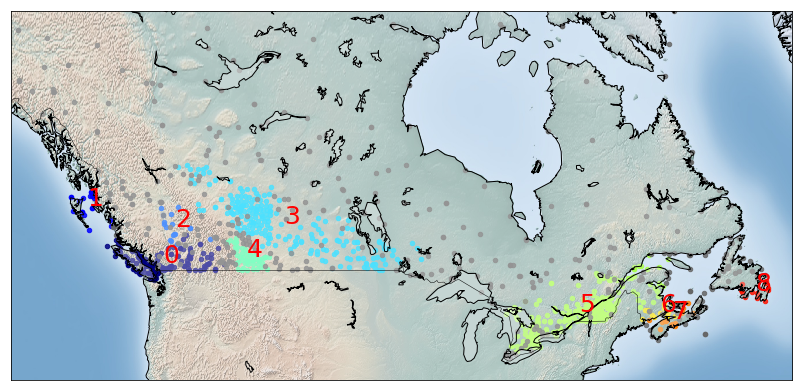

In [21]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))



#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = pdf[pdf.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)
        print ("Cluster "+str(clust_number)+', Avg Temp: '+ str(np.mean(clust_set.Tm)))